# Exploratory Data Analysis of Immigration to Canada

## Objectives
 **To Answer the following questions:**
1. Which 5 countries contributed the least number of immigrants to Canada?
2. Are there Financial/economic crisis that impacted immigration patterns to Canada?
3. Which two countries has the highest number of Immigrants to Canada.
4. Was there any natural disaster that impacted immigration to Canada from any country?
5. Are there countries whose citizens migrated to Canada due to lack of development in their home countries?
6. Which 5 countries contributed the highest number of immigrants to Canada?
7. Which continents contributes the highest number of Immigrants to Canada?
8. Does immigration to Canada increase by year?
9. Did any economic/political unrest coincide with higher immigration to Canada?
10. Show on a map the countries contributing most to immigration to Canada?

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Import Libraries](#0)<br>
2.  [Fetching Data](#1) <br>
3.  [Area Plots](#6) <br>
4.  [Histograms](#8) <br>
5.  [Bar Charts](#10) <br>
6.  [Line Plot](#10) <br>
7.  [Pie Charts](#10) <br>
8.  [Box Plots](#10) <br>
9.  [Scatter Plots](#10) <br>
10. [Bubble Plots](#10) <br>
11. [WaffleChart](#11) <br>
12. [WordCloud Chart](#11) <br> 
</div>


# Import Libraries<a id="0"></a>


Import the `matplotlib` library.


In [108]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import matplotlib.patches as mpatches # needed for waffle Charts
#import wordcloud
import wordcloud
#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # converting images into arrays
import urllib
print ('Wordcloud imported!')

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Wordcloud imported!
Matplotlib version:  3.7.0


# Fetching Data<a id="1"></a>

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website

In this project, I will focus on the Canadian Immigration data and use the **already cleaned dataset** and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.<br><br>

In [109]:
#df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_can = pd.read_csv('Canada.csv')
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's take a look at the first five items in our dataset.


In [110]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's find out how many entries there are in our dataset.


In [111]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


Set the country name as index - useful for quickly looking up countries using .loc method.


In [112]:
df_can.set_index('Country', inplace=True)

# Let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Notice now the country names now serve as indices.


In [113]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [114]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Area Plots<a id="6"></a>


In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a **Stacked Line Plot** or **Area plot**.


In [115]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any `NaN`, i.e. not a number, values will default to 0)

Text(0.5, 0, 'Years')

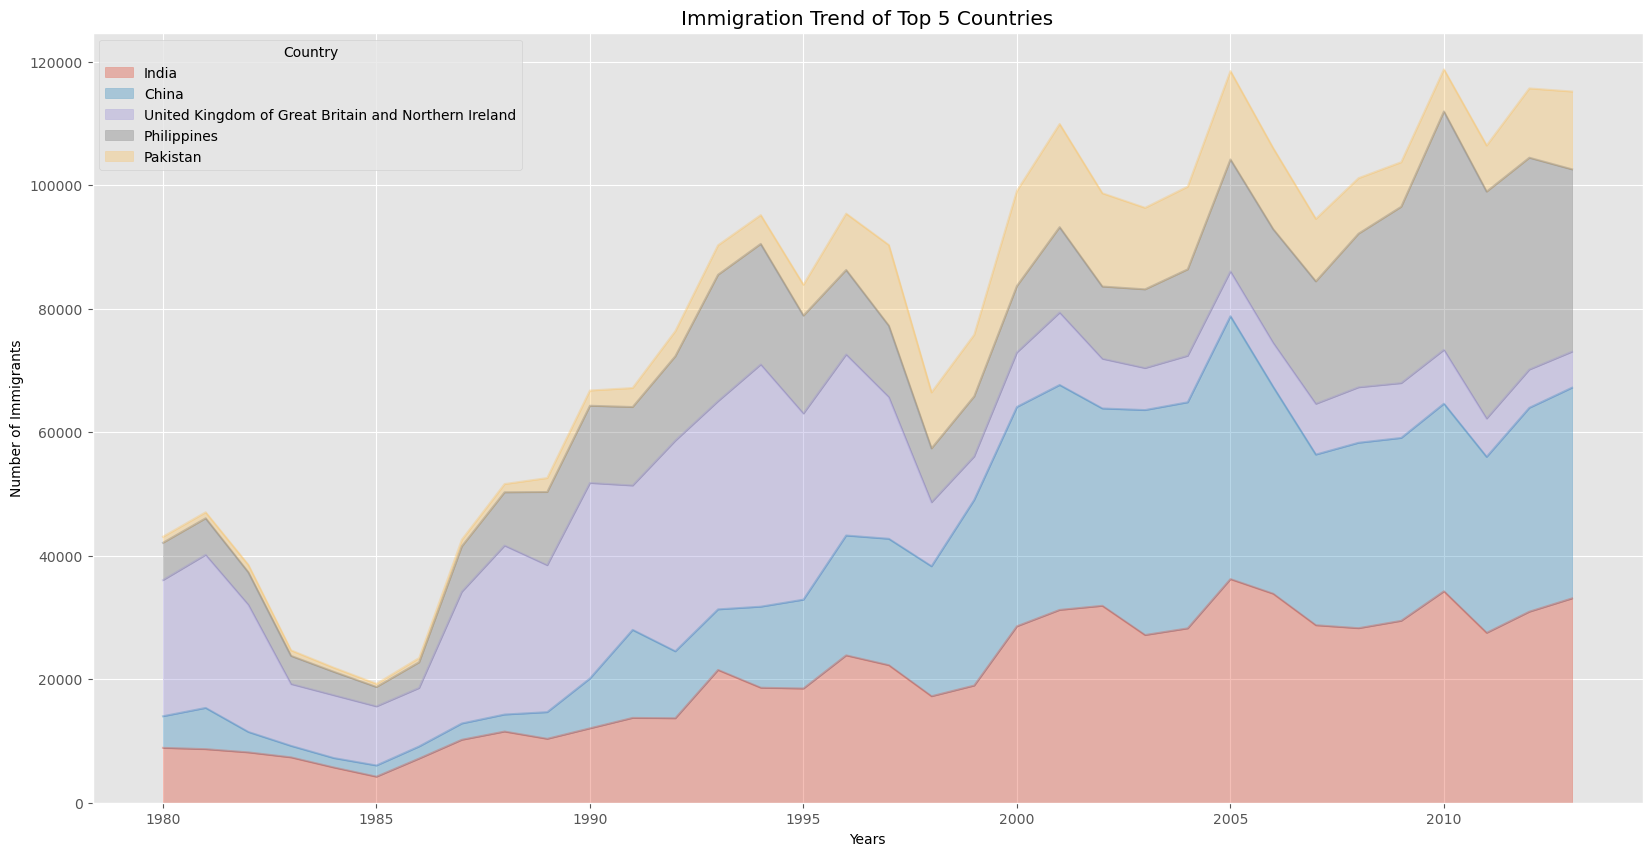

In [116]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Question**: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.


Text(0.5, 0, 'Years')

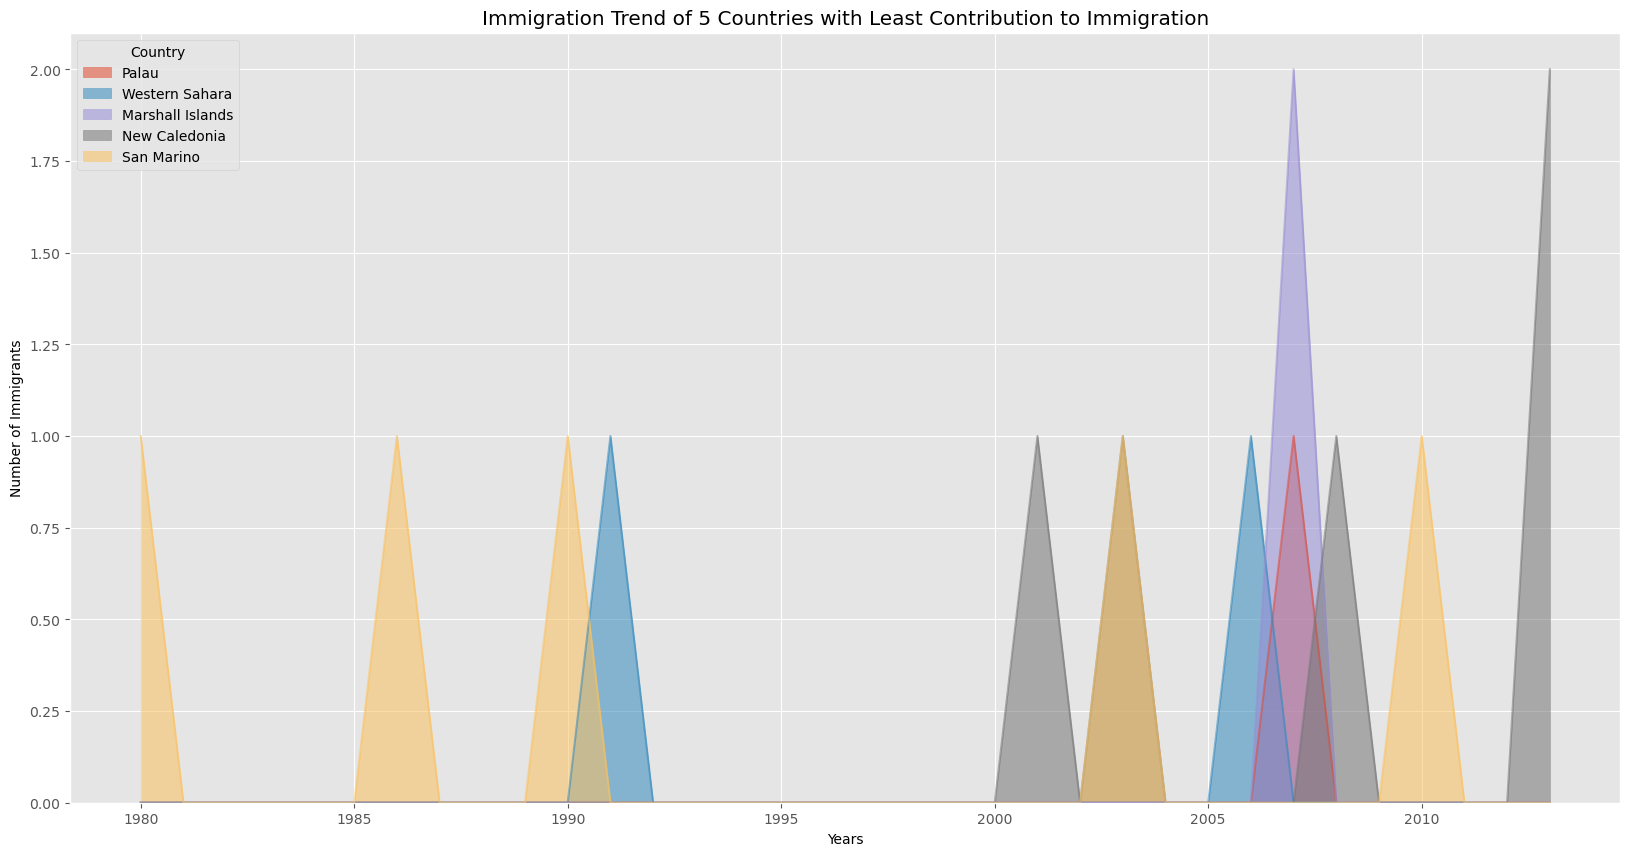

In [117]:
### type your answer here
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

# get the top 5 entries
df_last5 = df_can.head()

# transpose the dataframe
df_last5 = df_last5[years].transpose()
df_last5.head()

ax = df_last5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


**Insight**: Palau, Western Sahara, Marshell Islands, New Caledonia, San Marino has the number of immigrants to Canada From 1980 to 2023

# Histograms<a id="8"></a>

### **Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?


Before proceeding with creating the histogram plot, let's first examine the data split into intervals. To do this, I will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:

In [118]:
# let's quickly view the 2013 data
df_can['2013'].head()

Country
Palau               0
Western Sahara      0
Marshall Islands    0
New Caledonia       2
San Marino          0
Name: 2013, dtype: int64

In [119]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">


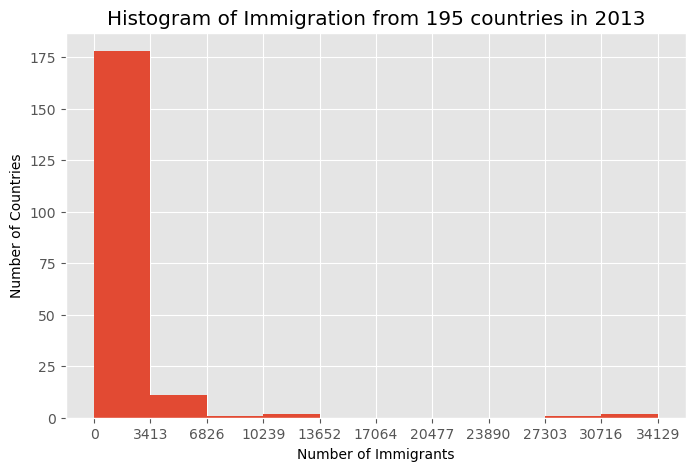

In [120]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

### **Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [121]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


Let's make a few modifications to improve the impact and aesthetics of the plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.


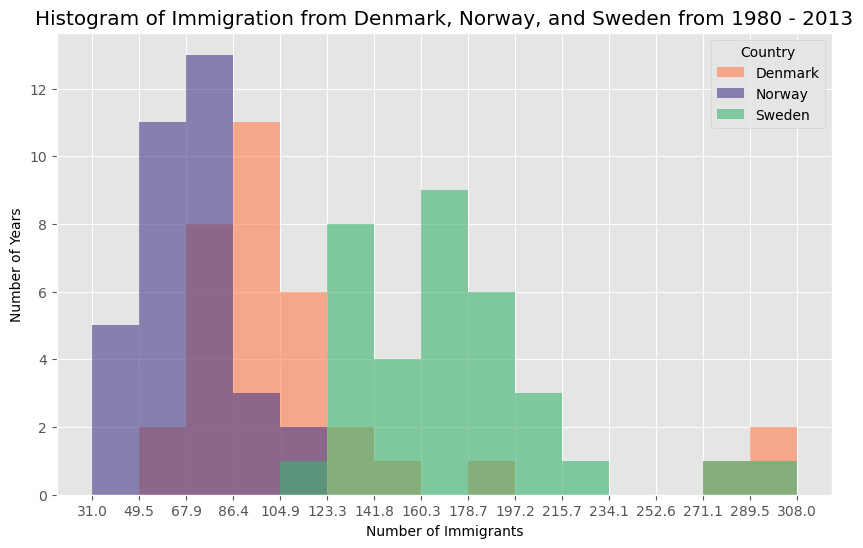

In [122]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### **Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.


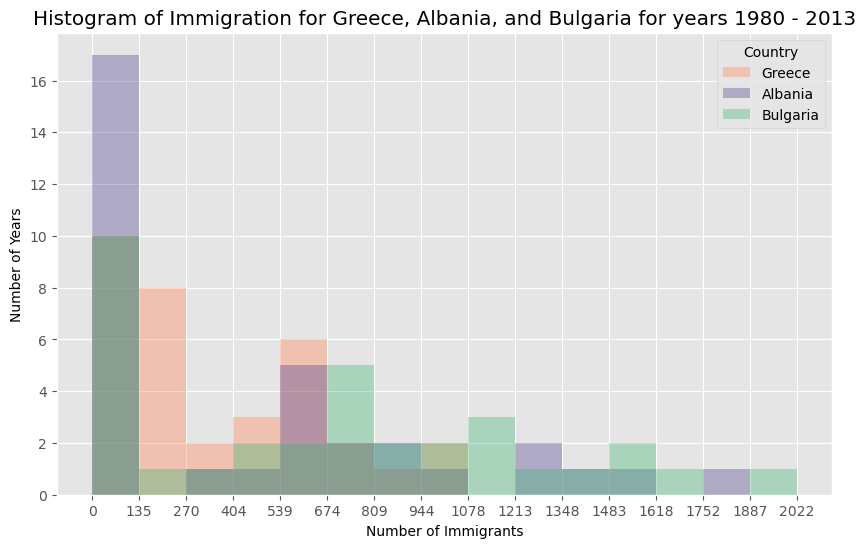

In [123]:
### type your answer here

df_a = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()

# let's get the x-tick values
count, bin_edges = np.histogram(df_a, 15)

# un-stacked histogram
df_a.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration for Greece, Albania, and Bulgaria for years 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Bar Charts (Dataframe) <a id="10"></a>


**Vertical bar plot**

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.


In [124]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

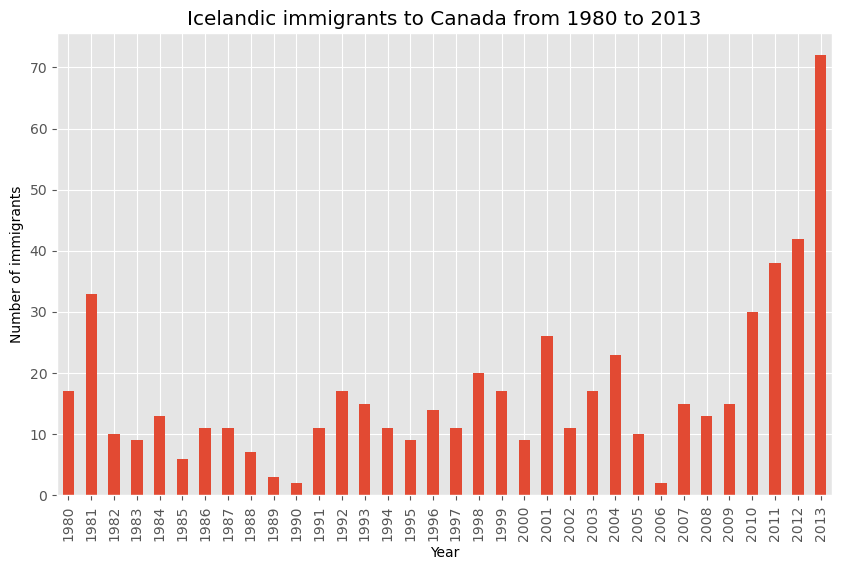

In [125]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

**Insight**: The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**.

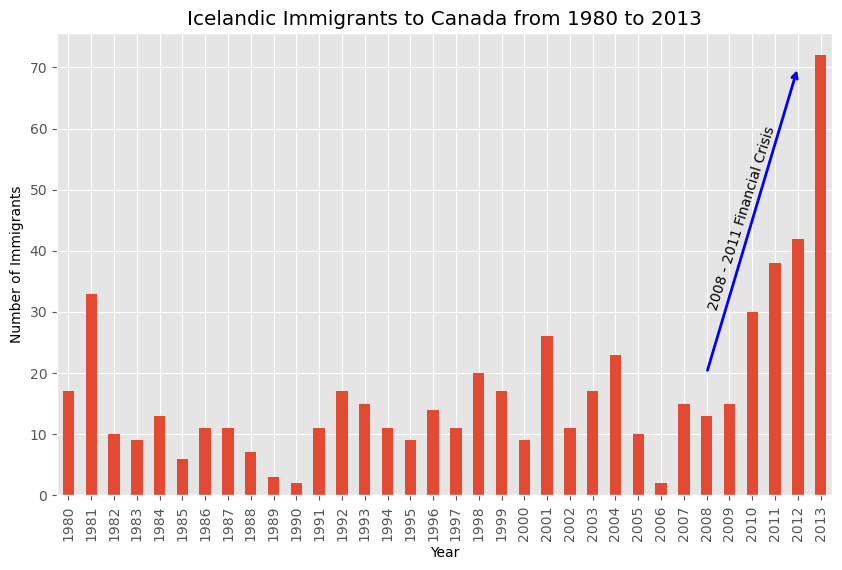

In [126]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

**Insight**: The number of immigrants to Canada from Iceland started increasing rapidly after 2008 due to this economic crisis

**Horizontal Bar Plot**

**Question:** Using the scripting later and the `df_can` dataset, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


Step 1: Get the data pertaining to the top 15 countries.


In [127]:
### type your answer here

#The correct answer is:
    
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # sort dataframe on 'Total' column (descending)
    df_can.sort_values(by='Total', ascending=True, inplace=True)

    # get top 15 countries
    df_top15 = df_can['Total'].tail(15)
    df_top15

```

</details>


Step 2: Plot data:

1.  Use `kind='barh'` to generate a bar chart with horizontal bars.
2.  Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

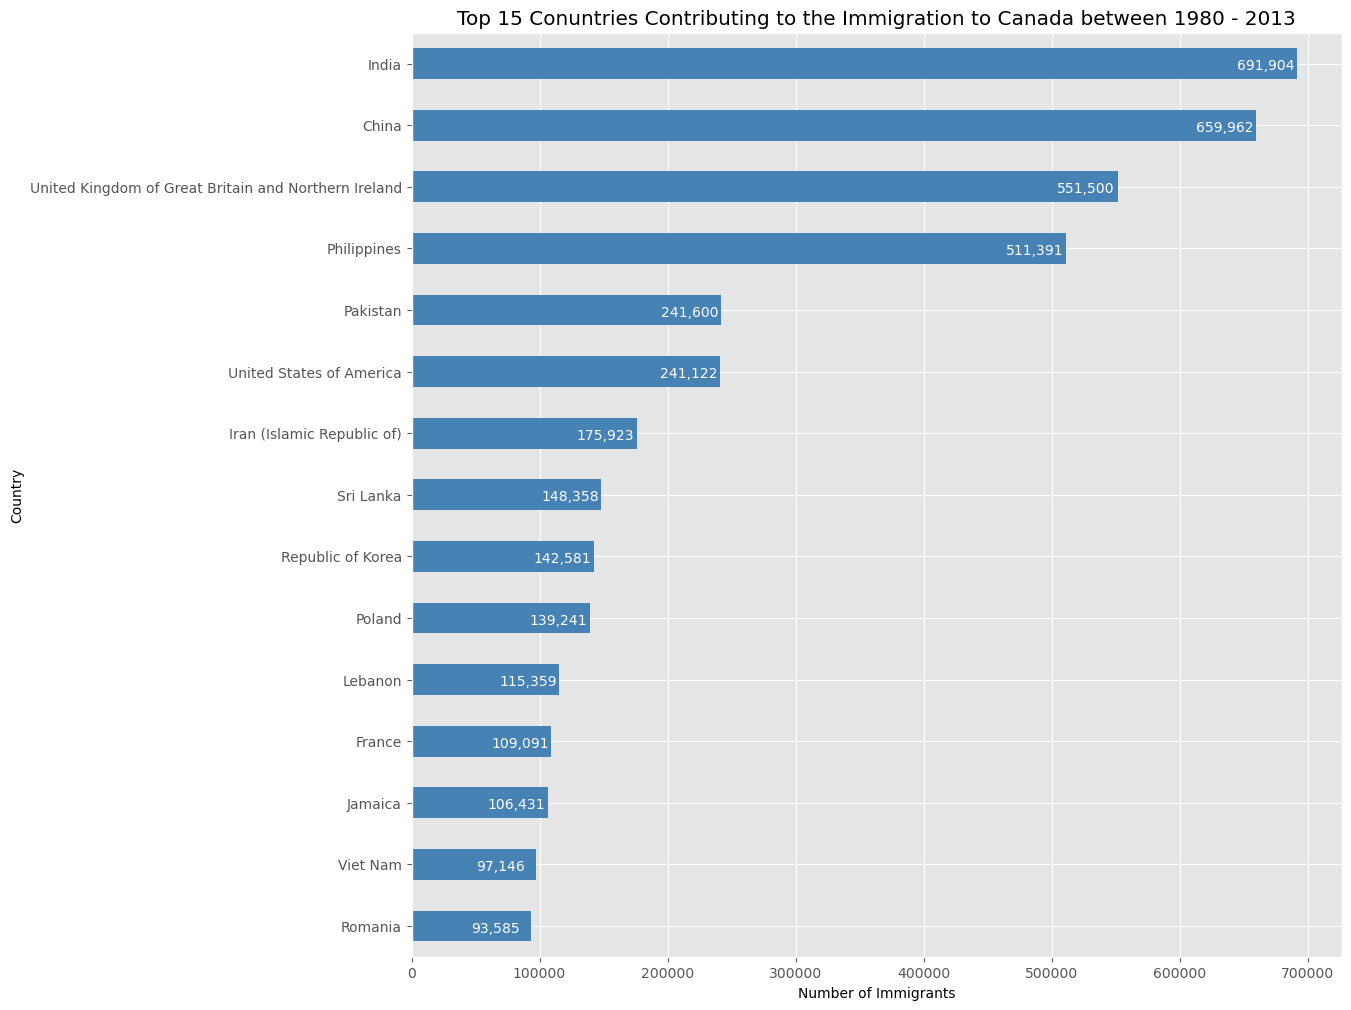

In [128]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

**Insight**: There are 691904 immigrants from India and 659962 from china, followed by 551500 Immigrants from Uk to Canada from 1980 to 2023

# Line Pots (Series/Dataframe) <a id="4"></a>

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. Lets investigate this impact using this data.

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.

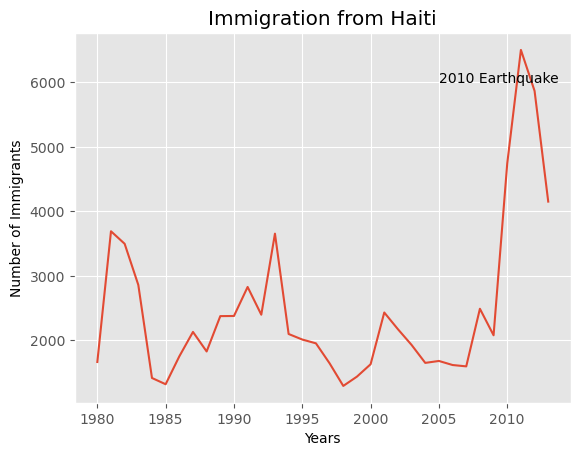

In [129]:
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2005, 6000, '2010 Earthquake') # see note below

plt.show()

**Insight:** It is clear from this line plot that the number of Haiti immigrants to Canada peaked in 2010 due this natural disaster

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.

Step 1: Get the data set for China and India, and display the dataframe.

In [130]:
india_china = df_can.loc[['India', 'China'], years]
india_china

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Since `india_china` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.

In [131]:
india_china = india_china .transpose()
india_china.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


<Axes: >

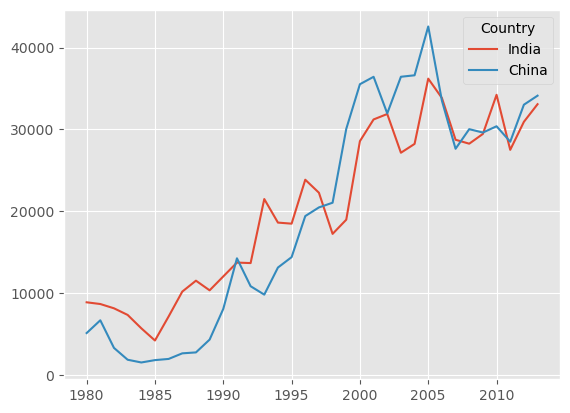

In [132]:
india_china.plot()

**Insight:**  India and China has similar immigration pattern to Canada, this is so much related to the budding times of chinese and Indian economy, so citizens sorted greener pastures in Canada.

**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

<Axes: >

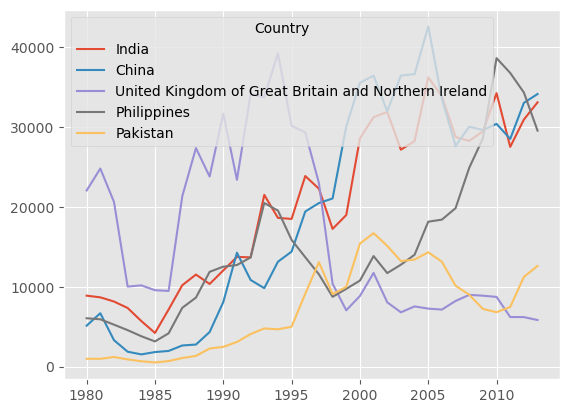

In [133]:
top_five= df_can.sort_values(by = 'Total', ascending = False).head()
top_five[years].transpose().plot()

**Insight**: India, China, UK, philippines and Pakistan are the top five countries with high immigration numbers to Canada

# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

*   Create pie charts, box plots, scatter plots and bubble charts

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

C:\Users\Ngwu Nneamaka\AppData\Local\Temp\ipykernel_7200\3466158456.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_can.groupby('Continent', axis=0).sum()


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


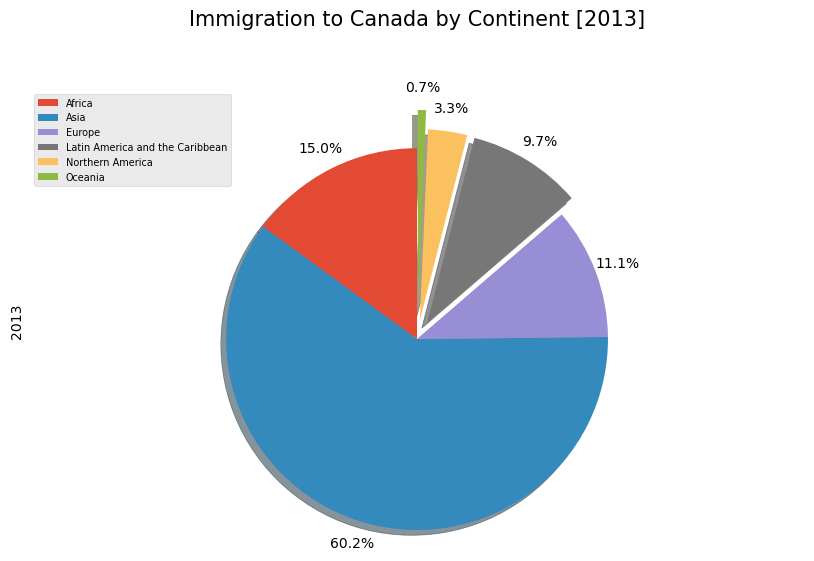

In [134]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

### type your answer here
df_2013= df_can.groupby(['Continent'], axis = 0)['2013'].sum()

explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
df_2013.plot(kind = 'pie',
            figsize=(10, 6),
            autopct='%1.1f%%', 
            startangle=90,    
            shadow=True,       
            labels=None,         # turn off labels on pie chart
            pctdistance=1.12,
            explode=explode_list)

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 

plt.show()

**Insight**: Asia contributed 62% of total immigrants to Canada from 1980 to 2013, with Africa at 15% and Europe at 11.1%

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

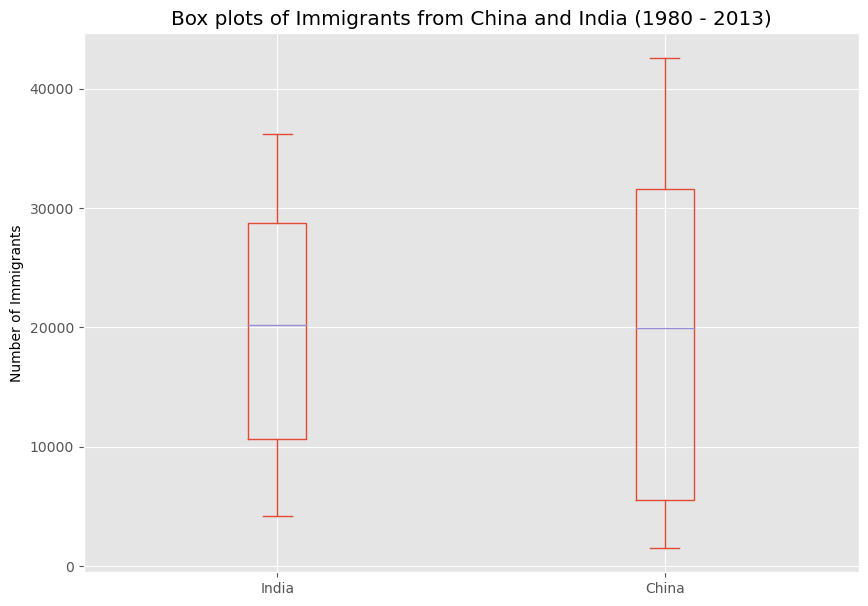

In [135]:
### type your answer here
df_CI = df_can.loc[['India', 'China'], years].transpose()


df_CI.plot(kind='box', figsize=(10, 7))
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe **df_top15**.

In [136]:
df_top15 = df_can.sort_values('Total', ascending = False).head(15)

Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame. Call the dataframe **new_df**.

In [137]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


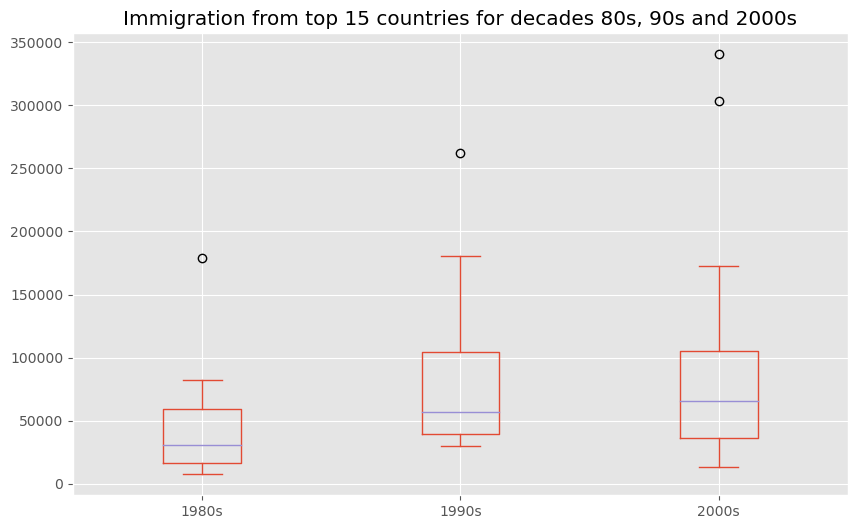

In [138]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

# Scatter Plots <a id="10"></a>

**Question:** Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.

In [139]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.

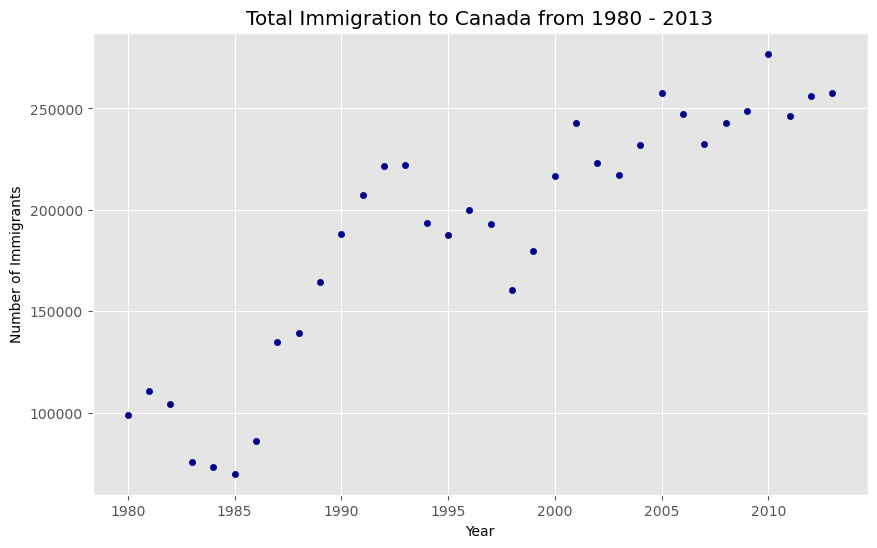

In [140]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

**Insight**: Immigration to Canada has a positive correlation with year. The number of immigrants increased from 1980 to 2013

# Bubble Plots <a id="12"></a>

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

**Step 1**: Get the data for Brazil and Argentina

In [141]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


**Step 2**: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.

In [142]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

**Step 3**: Plot the data.

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   I will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).

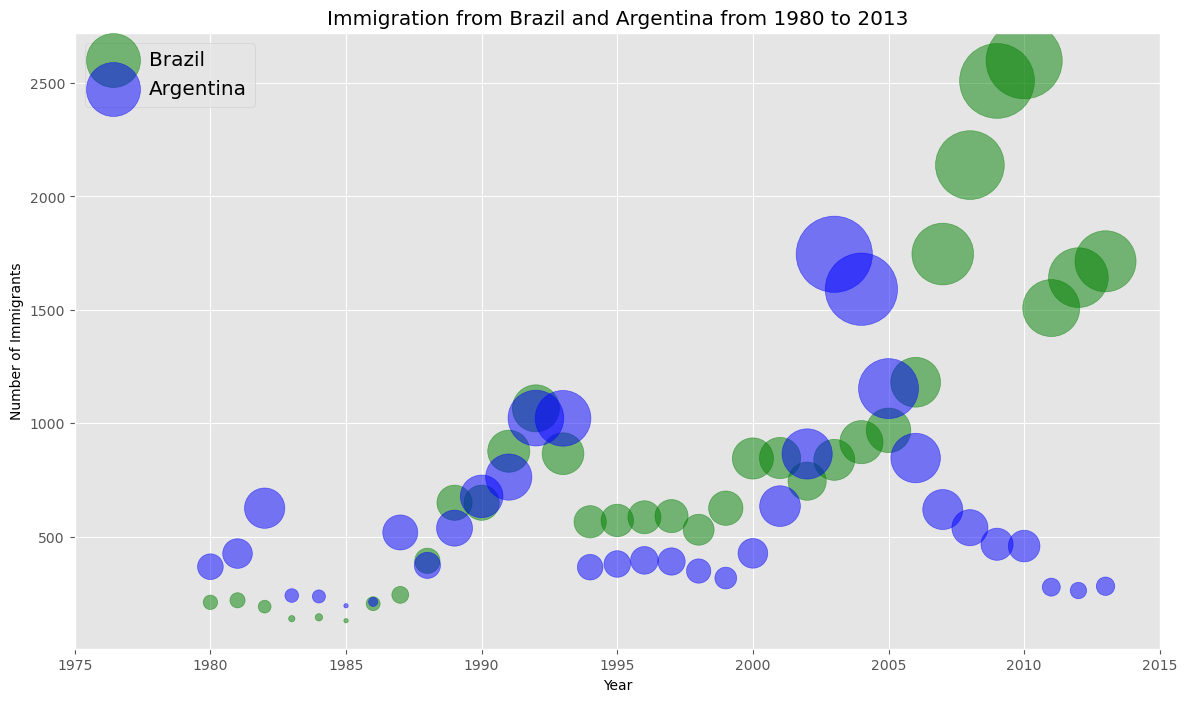

In [143]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 3000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 3000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

NB: The size of the bubble corresponds to the magnitude of immigrating population for each year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

**Insight One**: From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

**Insight Two**: On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

**Question**:Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013.

Step 1: Normalize the data pertaining to China and India.

In [144]:
### type your answer here

# normalized Chinese data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
# normalized Indian data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

Step 2: Generate the bubble plots.

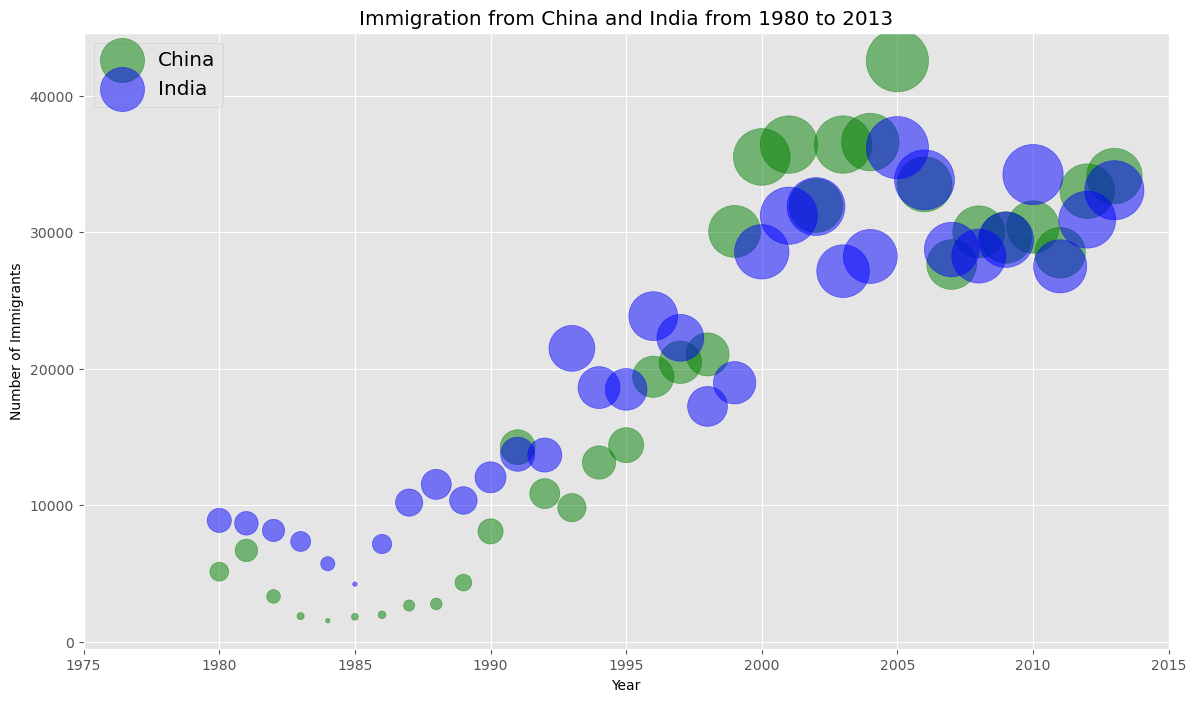

In [145]:
### type your answer here

ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

**Insight**: As Observed earlier, India and China has a similar pattern of immigrants to Canada

# Bar Plot<a id="10"></a>

**Question:** Create a bar plot to visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013.

In [146]:
#Sorting the dataframe on 'Total' in descending order
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries with head function
df_top5 = df_can.head()

#resetting the index back to original way
df_bar_5=df_top5.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_bar_5.Country)
label

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

##### The third name is too lengthy to fit on the x-axis as label. Let's fix this using indexing

In [147]:
label[2]='UK'
label

['India', 'China', 'UK', 'Philippines', 'Pakistan']

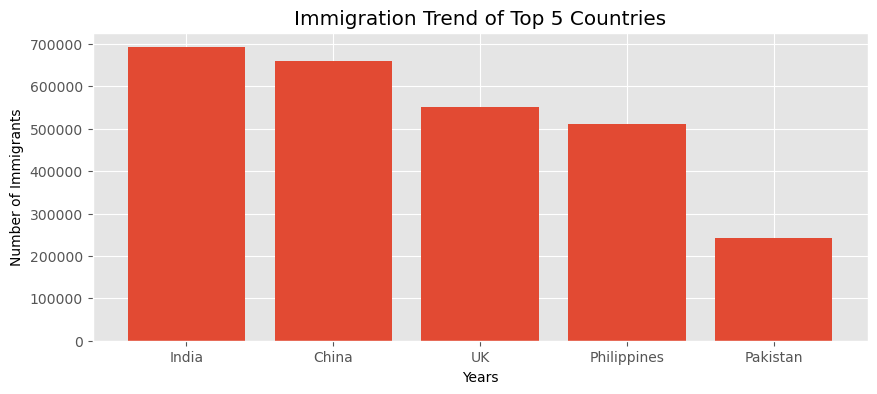

In [148]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label,df_bar_5['Total'], label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

**Question**: Create a bar plot of the 5 countries that contributed the **least** to immigration to Canada **from** 1980 to 2013.

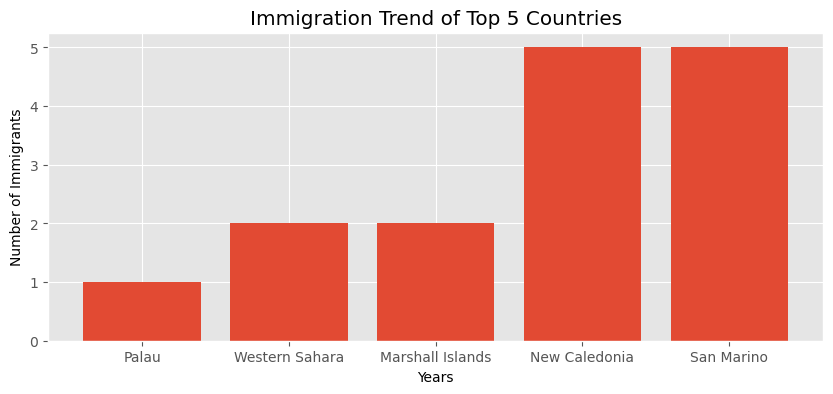

In [149]:
#Sorting the dataframe on 'Total' in descending order
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

# get the top 5 entries with head function
df_least5 = df_can.head()

#resetting the index back to original way
df_least5_bar=df_least5.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_least5_bar.Country)
#label

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, df_least5_bar['Total'],label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

# WaffleChart Plot <a id="11"></a>

In [150]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [151]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

In [152]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

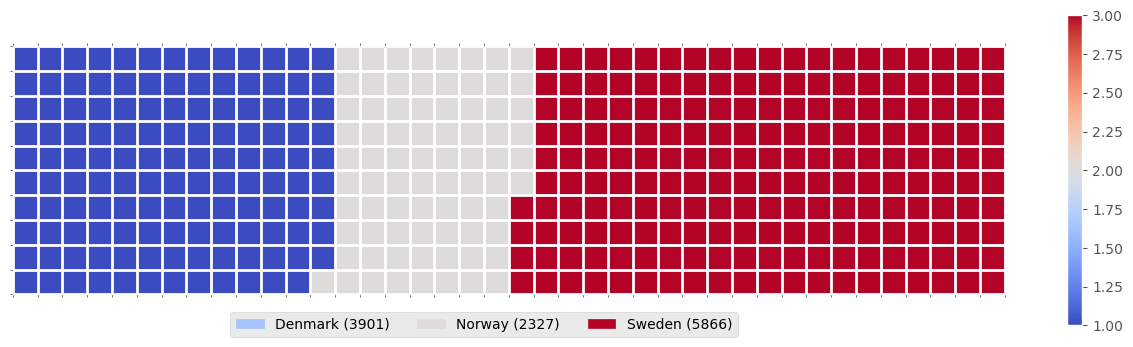

In [153]:
create_waffle_chart(categories, values, height, width, colormap)

There seems to be a new Python package for generating `waffle charts` called [PyWaffle](https://github.com/ligyxy/PyWaffle), <br><br>Let's create the same waffle chart with **pywaffle** now

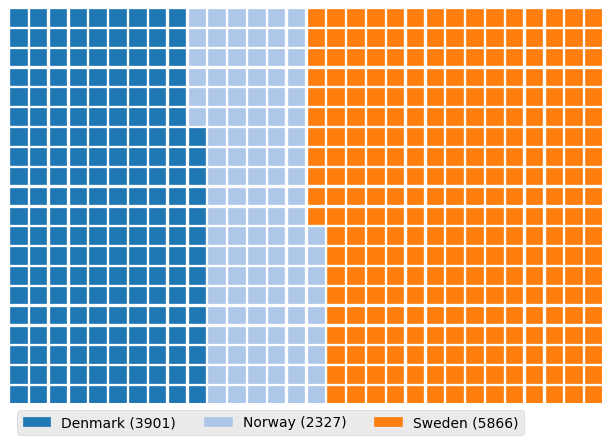

In [154]:
#import Waffle from pywaffle
from pywaffle import Waffle

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

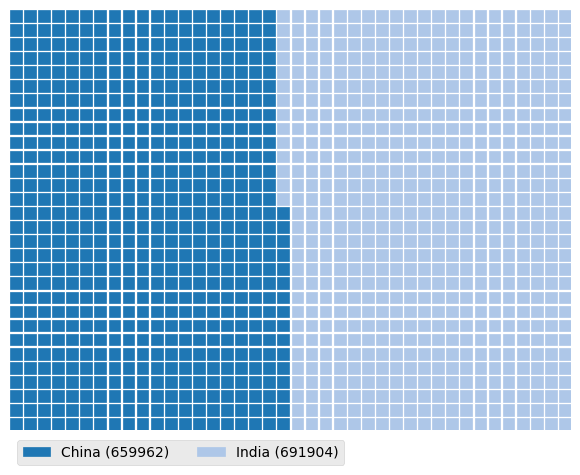

In [155]:
#hint
#create dataframe
data_CI = df_can.loc[['China', 'India'], :]
#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                rows = 30, columns =40, #pass the number of rows and columns for the waffle 
                values = data_CI['Total'], #pass the data to be used for display
                cmap_name = 'tab20', #color scheme
                legend = {'labels':[f"{k} ({v})" for k, v in zip(data_CI.index.values,data_CI.Total)],
                          'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 2}
                #notice the use of list comprehension for creating labels 
                #from index and total of the dataset
                    )

#Display the waffle chart
plt.show()

# Wordcloud Plot <a id="12"></a>

In [156]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [157]:
max_words = 90
word_string = ''
for country in df_can.index.values:
     # check if country's name is a single-word name
    if str(country).count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'Colombia Morocco Egypt Portugal Guyana Haiti Romania Jamaica France Lebanon Poland Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines China China China China China China China China China India India India India India India India India India '

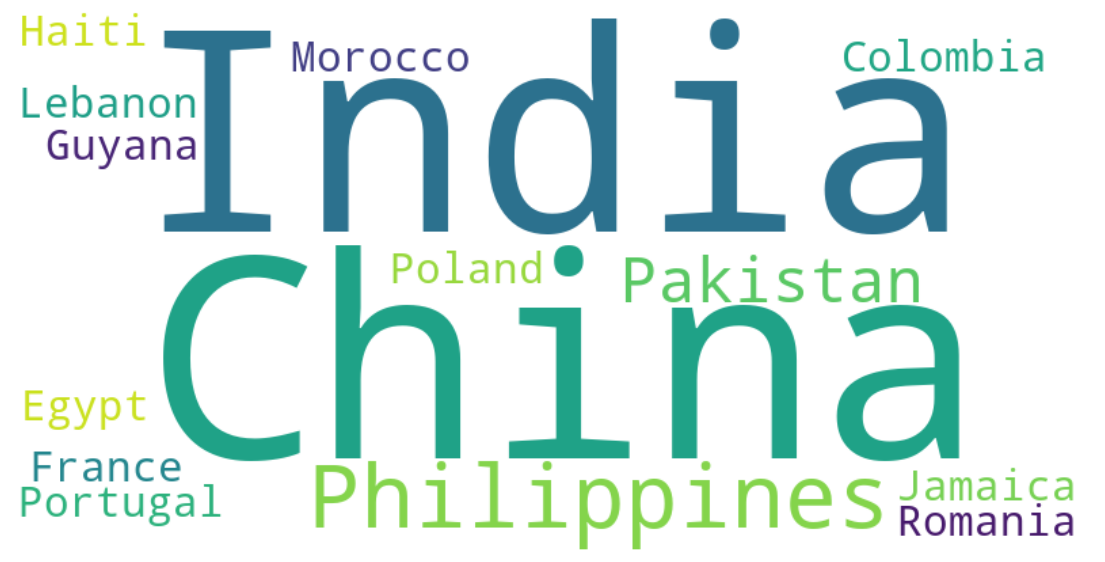

In [158]:
# instantiate a word cloud object
wordcloud = WordCloud(background_color='white', mask=canada)

# generate the word cloud
wordcloud.generate(word_string)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [171]:
print('GeoJSON file downloaded!')

world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [172]:
df_can1 = df_can.reset_index()

In [173]:
world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json' # geojson file

# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df_can1,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

**Insight**: From the map, It is clear that India has the highest number of immigrants to Canada.

# Insights and Conclusion

1. Palau, Western Sahara, Marshell Islands, New Caledonia, San Marino has the number of immigrants to Canada From 1980 to 2023
2. The number of immigrants to Canada from Iceland started increasing rapidly after 2008 due to this economic crisis leading to the bankinng sector collapse in Iceland.
3. There are 691904 immigrants from India and 659962 from china, followed by 551500 Immigrants from Uk to Canada from 1980 to 2023
4.  It is discovered that the number of Haiti immigrants to Canada peaked in 2010 due to the 2010 devasting earthquate and Canada's improved policy to accept more refugees from Haiti
5. India and China has similar immigration pattern to Canada, this is so much related to the budding times of chinese and Indian economy, so citizens sorted greener pastures in Canada.
6. India, China, UK, philippines and Pakistan are the top five countries with high immigration numbers to Canada
7. Asia contributed 62% of total immigrants to Canada from 1980 to 2013, with Africa at 15% and Europe at 11.1%
8. Immigration to Canada has a positive correlation with year. The number of immigrants increased from 1980 to 2013
9. Insight 9: I can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

10. Insight 9: On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.
11. From the map, It is clear that India has the highest number of immigrants to Canada

# Conclusion
This analysis provides insights into the patterns and trends of immigration to Canada over the past four decades. The findings suggest that economic factors, such as financial crises and economic growth, play a significant role in immigration decisions. Political and natural disasters can also impact immigration patterns.